# Check-in time analysis

* In this notebook we investigate the temporal characteristics between same-place check-ins
* We discover a common frequency of check-ins around period 1400
* We deduce that the underlying time data is actually minutes since there are 60*24=1440 minutes in a day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
# Enable grid by default
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
n_bins = 10000 # Number of histogram bins to use
n_places = 100 # Only consider this number of top check-in places

In [4]:
# Sort places according to number of check-ins
places = df.groupby('place_id')['place_id'].agg('count').sort_values(ascending=False)

# Calculate time difference between subsequent same-place check-ins
ac = pd.Series()
for p in range(n_places):
    times = df[df.place_id==places.index[p]].time.sort_values()
    _ac = pd.Series([(y-x) for x,y in itertools.combinations(times, 2)])
    ac = pd.concat([ac, _ac])

### Histogram
 * The peaks below illustrate the cyclic nature of same-place check-ins

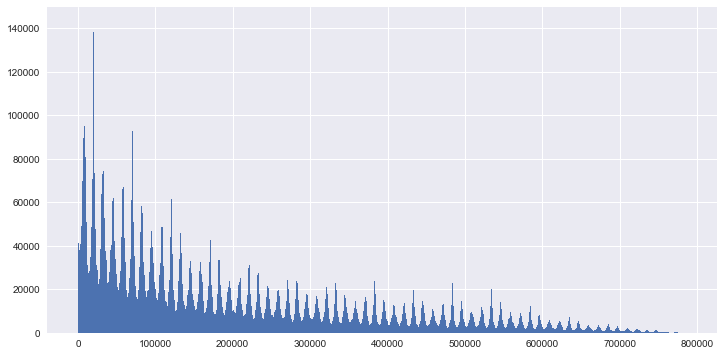

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_ylim(0, 150000) # Tweak plot region for clarity
ac.hist(bins=n_bins, ax=ax)

### Fast Fourier Transform
 * Notice the most dominant peak is around 1400

(0, 5000.0)

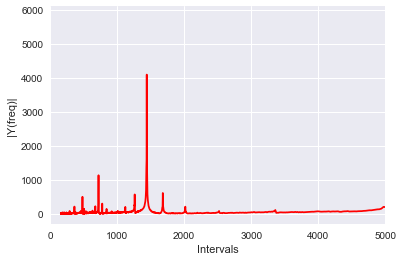

In [7]:
# Fast fourier transform (https://plot.ly/matplotlib/fft/)
hist, bins = np.histogram(ac, bins=n_bins)
Ts = bins[-1]/n_bins; # sampling interval
Fs = 1.0/Ts;  # sampling rate

n = len(hist) # length of the signal
k = np.arange(n)
T = n/Fs
k[0] = 1 # avoid divide by 0
frq = T/k # two sides frequency range
frq[0] = float('inf') # avoid divide by 0
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(hist)/n # fft computing and normalization
Y = Y[range(n//2)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(frq,abs(Y),'r')
ax.set_xlabel('Intervals')
ax.set_ylabel('|Y(freq)|')
ax.set_xlim([0,n/2])

In [8]:
# Sort and display intervals by power
df = pd.DataFrame(data={'intervals': frq, 'power': abs(Y)})
df[df.intervals<(n_bins/2)].sort_values(['power'], ascending=False)[:20]

,intervals,power
546,1439.930403,4098.513810
545,1442.572477,1787.284380
547,1437.297989,1601.492349
548,1434.675182,1380.652661
544,1445.224265,1271.812588
1092,719.965201,1140.489946
549,1432.061931,976.233945
543,1447.885820,870.150411
550,1429.458182,697.639025
468,1679.918803,619.479683
